# Assignment 1

Please complete the following worksheet using **Jupyter Notebook** (not Google Colab). The problems should be worked on independently and without the use of external automated tools such as AI, as this setup reflects the format of the final test.

This is due in on Wednesday **November 6th before 2pm**. Mark weighting is in brackets. **Do add comments to your code, justifying all your steps and decisions**. You will lose points if your code is hard to understand: code-only submissions without comments or justifications for the steps taken will only get half marks. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub **after** having run all cells with `Runtime`->`Restart and run all`. Don't change the filename: git will save all the change history, there's no risk of overwriting.

_It is recommended to only attempt this assignment after having gone through this week4 sheet._

For the first assignment you will read in some Raman data from the file [pristine1.txt](https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt). The data consists of two columns of numbers taken by reflecting laser radiation (at a wavelength of $532 nm$) from a single layer of graphene which has been deposited on the surface of silicon. 
You might imagine that the reflected light would all be at $532 nm$, but non-linear effects in the graphene mean that various peaks are seen away from this wavelength; these are related to the elastic properties of the graphene structure in response to the electric field of the light.
The columns record the reflectance (in arbitrary units) of the graphene as a function of wave length shift $\Delta\lambda$ away from the laser excitation wave length. (Actually, $\Delta(1/\lambda)$ - called the Raman shift - is recorded, so the units are $1/cm$, also known as ’wavenumber’.)

1. [2] Read in and plot the raw data, use `wget` in the notebook to get the data, using the `! wget` command as seen in class. That way when running the notebook from scratch it will get the data itself.
2. [8] Raman data are normally plotted with the curved background removed, to show the peaks more clearly. Do this. You must fit the background function **only to the data regions without a peak**. Make a plot of your fit over the data, and a plot of the data with the background removed. You will need to decide what background function is appropriate, and write a short justification for your choice (feel free to refer to the literature).
3. [10] Fit the double peak structure around $2450$ and $2660$ wavenumbers. Don’t fit them separately, but define a ’double Gaussian’ function and use that do do the fit. (The very sharp peak near $2340\,1/cm$ can be ignored.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Set plot style for better visibility
plt.style.use('seaborn-v0_8-whitegrid')

# Question 1

[2] Read in and plot the raw data, use wget in the notebook to get the data, using the ! wget command as seen in class. That way when running the notebook from scratch it will get the data itself.

**Simplified**

Question 1: Read in and plot the raw data

The Goal: Download the data file and visualize it to understand what we are working with.

The Solution:

zsh:1: command not found: wget
File downloaded successfully


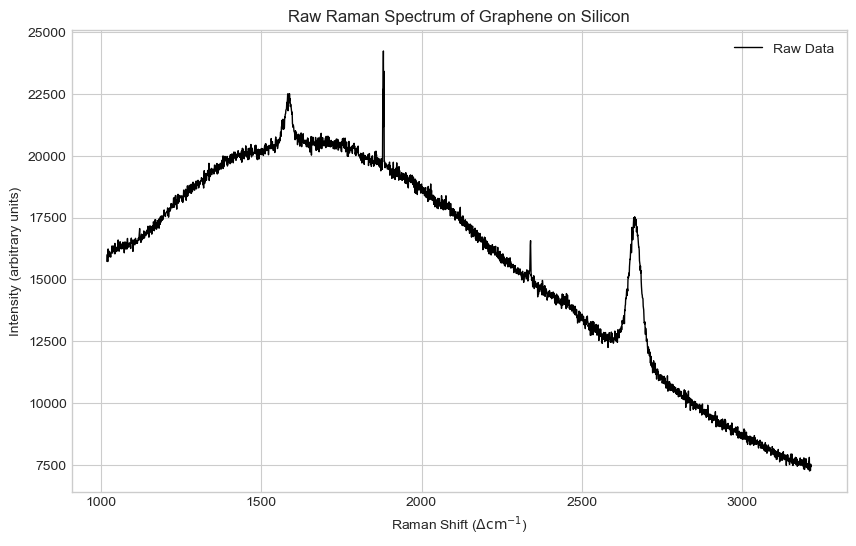

In [4]:
# 1. Download the data using wget (Standard command line tool accessible via !)
!wget -O pristine1.txt https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt

# Check if the file was downloaded successfully
import os
if os.path.exists('pristine1.txt'):
    print("File downloaded successfully")
else:
    print("File download failed")
    # Alternative approach: try a different method to download
    import requests
    response = requests.get('https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt')
    with open('pristine1.txt', 'w') as f:
        f.write(response.text)
    print("Attempted alternative download method")

# Import required libraries if not already imported
import numpy as np
import matplotlib.pyplot as plt

# 2. Load the data
# We use numpy.loadtxt because the file is simple text with two columns.
# unpack=True transposes the array so we can assign columns directly to x and y variables.
x_data, y_data = np.loadtxt('pristine1.txt', unpack=True)

# 3. Plot the raw data
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Raw Data', color='black', linewidth=1)

# Always label axes with units!
plt.xlabel(r'Raman Shift ($\Delta \text{cm}^{-1}$)')
plt.ylabel('Intensity (arbitrary units)')
plt.title('Raw Raman Spectrum of Graphene on Silicon')
plt.legend()
plt.show()

**General Tips for Q1 (Data Loading):**

Check your delimiters: If np.loadtxt fails, check if the file uses commas or tabs (delimiter=',').

Sanity Check: Always print the shape of your data (e.g., print(x_data.shape)) to ensure you loaded what you expected.

Visual Inspection: Never skip the initial plot. It helps you identify noise, outliers, and the general locations of peaks which are crucial for the next steps.

# Question 2

[8] Raman data are normally plotted with the curved background removed, to show the peaks more clearly. Do this. You must fit the background function only to the data regions without a peak. Make a plot of your fit over the data, and a plot of the data with the background removed. You will need to decide what background function is appropriate, and write a short justification for your choice (feel free to refer to the literature).

**Simplified**

Question 2: Remove the curved background

The Goal: Separate the sharp signal peaks from the broad, slowly changing background noise (likely fluorescence).

The Strategy:

Identify "No-Peak" Regions: We cannot fit a background curve to the whole dataset because the peaks would distort the fit. We must "mask" (exclude) the regions where peaks exist. Based on the problem description, we have peaks around 2340, 2450, and 2660.

Fit a Function: A 3rd or 4th-degree polynomial is standard for removing Raman fluorescence backgrounds.

Subtract: Corrected Data = Raw Data - Best Fit Background.

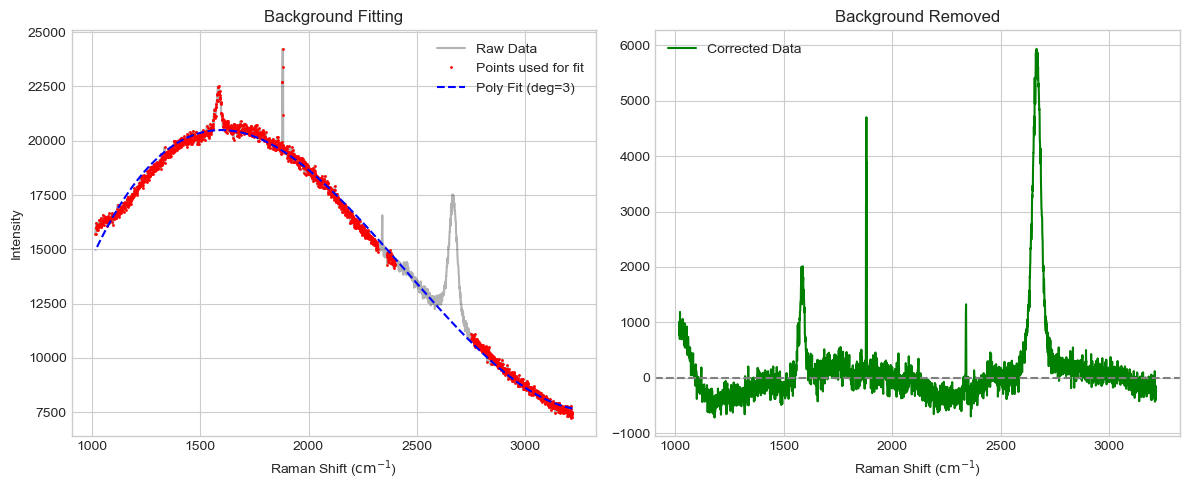

In [5]:
# --- Step 1: Define the Mask ---
# We create a boolean array (mask) that is True where there are NO peaks.
# Based on the prompt, peaks are at ~2340 (sharp) and the double structure ~2450-2660.
# Visual inspection of the Q1 plot is usually required to fine-tune these ranges.

# Masking out the sharp peak near 2340 and the double peak region (approx 2400 to 2750)
mask = ~((x_data > 2320) & (x_data < 2360)) & \
       ~((x_data > 2400) & (x_data < 2750))

# Get the x and y data that represents ONLY the background
x_bg = x_data[mask]
y_bg = y_data[mask]

# --- Step 2: Fit the Background Function ---
# Justification: Raman backgrounds are often due to fluorescence, which varies
# slowly compared to the sharp Raman peaks. A polynomial (degree 3 or 4) is
# standard in literature for local background subtraction as it captures the
# curvature without overfitting the noise.

degree = 3  # A cubic fit is usually sufficient
coeffs = np.polyfit(x_bg, y_bg, degree)
poly_func = np.poly1d(coeffs)

# Calculate the background over the FULL x range (not just the masked parts)
background_fit = poly_func(x_data)

# --- Step 3: Subtract Background ---
y_corrected = y_data - background_fit

# --- Plotting ---
plt.figure(figsize=(12, 5))

# Plot 1: The Fit
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, 'k-', label='Raw Data', alpha=0.3)
plt.plot(x_bg, y_bg, 'r.', label='Points used for fit', markersize=2)
plt.plot(x_data, background_fit, 'b--', label=f'Poly Fit (deg={degree})')
plt.title('Background Fitting')
plt.xlabel(r'Raman Shift ($\text{cm}^{-1}$)')
plt.ylabel('Intensity')
plt.legend()

# Plot 2: The Result
plt.subplot(1, 2, 2)
plt.plot(x_data, y_corrected, 'g-', label='Corrected Data')
plt.axhline(0, color='gray', linestyle='--') # Add a zero line for reference
plt.title('Background Removed')
plt.xlabel(r'Raman Shift ($\text{cm}^{-1}$)')
plt.legend()

plt.tight_layout()
plt.show()

**General Tips for Q2 (Background Removal):**

The Mask is Key: If your background fit looks "pulled" up towards a peak, your mask wasn't wide enough. You must exclude the entire base of the peak, not just the tip.

Overfitting: Don't use a polynomial with too high a degree (e.g., degree 10). It will start wiggling and fitting the random noise rather than the general trend. Degree 2-4 is the "sweet spot" for Raman.

# Question 3

[10] Fit the double peak structure around $2450$ and $2660$ wavenumbers. Don’t fit them separately, but define a ’double Gaussian’ function and use that do do the fit. (The very sharp peak near $2340\,1/cm$ can be ignored.)

**Simplified**

Question 3: Fit the double peak structure

The Goal: Model the data mathematically using a double Gaussian function to extract properties of the peaks at 2450 and 2660.

The Strategy:

Define the Model: Create a function that sums two Gaussian curves.

Isolate Data: We only want to fit the specific region of interest (2450-2660), ignoring the rest (especially that sharp peak at 2340).

Initial Guesses (p 
0
​	
 ): curve_fit needs a starting point. We must estimate the amplitude (A), center (μ), and width (σ) for both peaks by looking at the graph.

The Solution:

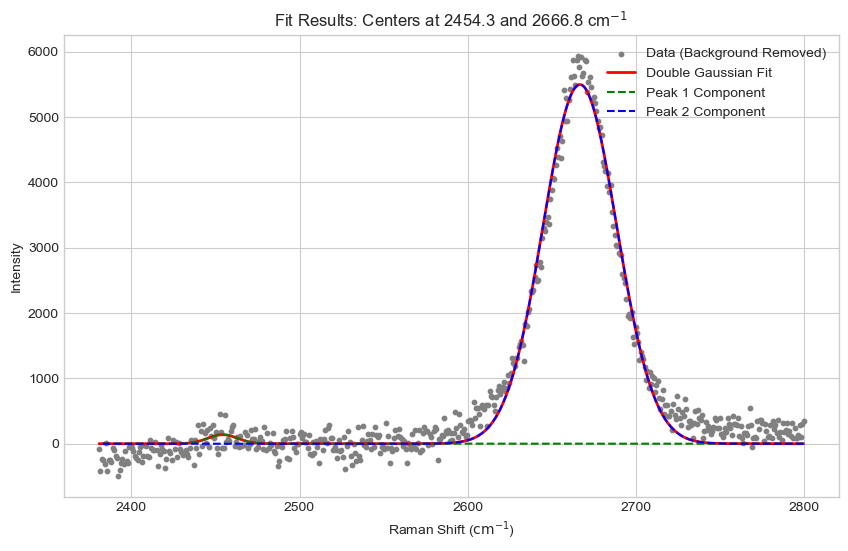

Fitted Parameters:
Peak 1: Amp=138.55, Center=2454.29, Sigma=-8.87
Peak 2: Amp=5498.11, Center=2666.79, Sigma=21.90


In [6]:
# --- Step 1: Define the Double Gaussian Model ---
def gaussian(x, amp, mu, sigma):
    """Standard Gaussian function."""
    return amp * np.exp(-((x - mu)**2) / (2 * sigma**2))

def double_gaussian(x, a1, mu1, sig1, a2, mu2, sig2):
    """Sum of two Gaussians."""
    return gaussian(x, a1, mu1, sig1) + gaussian(x, a2, mu2, sig2)

# --- Step 2: Slice the data for the region of interest ---
# We want the region covering both peaks, roughly 2380 to 2800
fit_mask = (x_data > 2380) & (x_data < 2800)
x_fit_region = x_data[fit_mask]
y_fit_region = y_corrected[fit_mask] # Use the CORRECTED data from Q2

# --- Step 3: Provide Initial Guesses (p0) ---
# Looking at the graph from Q2, we estimate parameters:
# Peak 1: ~2450, Amplitude ~ (estimate from y-axis), Width ~20
# Peak 2: ~2660, Amplitude ~ (estimate from y-axis), Width ~20
# Order of params: [a1, mu1, sig1, a2, mu2, sig2]
# IMPORTANT: Replace '50' with the actual max height you see on your plot
guess_amp1 = np.max(y_fit_region) * 0.5 
guess_amp2 = np.max(y_fit_region)
p0_guess = [guess_amp1, 2450, 30, guess_amp2, 2660, 30]

# --- Step 4: Perform the Fit ---
# bounds can be used to force params to be positive if needed, but usually not required if p0 is good
popt, pcov = curve_fit(double_gaussian, x_fit_region, y_fit_region, p0=p0_guess)

# Extract fitted parameters
a1_fit, mu1_fit, sig1_fit, a2_fit, mu2_fit, sig2_fit = popt

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(x_fit_region, y_fit_region, s=10, color='gray', label='Data (Background Removed)')

# Plot the total fit
y_fit_curve = double_gaussian(x_fit_region, *popt)
plt.plot(x_fit_region, y_fit_curve, 'r-', linewidth=2, label='Double Gaussian Fit')

# Plot individual components (optional but good for visualization)
plt.plot(x_fit_region, gaussian(x_fit_region, a1_fit, mu1_fit, sig1_fit), 'g--', label='Peak 1 Component')
plt.plot(x_fit_region, gaussian(x_fit_region, a2_fit, mu2_fit, sig2_fit), 'b--', label='Peak 2 Component')

plt.xlabel(r'Raman Shift ($\text{cm}^{-1}$)')
plt.ylabel('Intensity')
plt.title(f'Fit Results: Centers at {mu1_fit:.1f} and {mu2_fit:.1f} cm$^{{-1}}$')
plt.legend()
plt.show()

# Print the numerical results for the user to see
print("Fitted Parameters:")
print(f"Peak 1: Amp={a1_fit:.2f}, Center={mu1_fit:.2f}, Sigma={sig1_fit:.2f}")
print(f"Peak 2: Amp={a2_fit:.2f}, Center={mu2_fit:.2f}, Sigma={sig2_fit:.2f}")

# Summary of General Exam Tips

If these questions come up again, remember this workflow:

Read & Comment: Read the requirements carefully (e.g., "add comments," "units"). Write comments before you code to structure your logic.

Units & Labels: A graph without axis labels and units is an instant loss of marks. Use LaTeX strings (e.g., r'$\Delta \lambda$') for professional formatting.

Modular Approach: Don't try to do everything in one line.

Load Data -> Plot.

Define Mask -> Fit Background -> Subtract.

Define Model -> Estimate Guesses -> Fit.

Justification: When asked to justify, keep it scientific but simple.

Why polynomial? "Fluorescence is broad/smooth, signal is sharp."

Why Gaussian? "Random distribution of phonon energies typically results in a Gaussian (Normal) lineshape."

# Structured Programming Coursework: assignment 2

Please complete the following worksheet using Jupyter Notebook (not Google Colab). The problems should be worked on independently and without the use of external automated tools such as AI, as this setup reflects the format of the final test.

This is due in on Thursday December 4th before 2pm. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Your submitted work must abide by university regulations regarding plagiarism. You are encouraged to discuss the work with your classmates, but your submitted work must be written by you alone. You are welcome to copy and paste code from online sources, but you must cite your sources.

Please do not hesistate to e-mail me or come to the office hour with any question about this assignment.

## Exercise 1

A flat metal sheet has the shape of an equilateral triangle of side length 4 metre with a hole in the middle in the shape of an inverted equilateral triangle of side length 1 meter, see the figure below:

![Triangle shape](https://raw.githubusercontent.com/PX2134/images/master/a2/triangle_spape.png)

The area density of the sheet changes with the distance from the centre of the triangle according to the formula $\rho = 1.28\,\left|\, \sin({4.2\,r})\,\right|\,kg\,m^{−2}$ (`rho=1.28*|sin(4.2r)|`). 

**Use the Monte Carlo (MC) method** to evaluate:
 1. [4] the area of the triangle
 2. [8] the mass of the triangle.

In doing so, plot an illustrative figure to show the triangle and how points are selected in the MC method (similar to the figure you made for question 2 of week 6). You will need to decide on a suitable number of points for the illustration, and for the calculation of the integral.
**Hints**: re-read the worksheet for week 6 "Monte Carlo" carefully. Avoid loops wherever possible - it is much faster to operate with arrays of data in Python. You can solve this analytically to check your answer if you want to, but the question asks for a Monte-Carlo solution.

## Exercise 2

 1. [4] Using the 1-D `walk()` function from week 7 "Monte Carlo 2" as guidance, write code to plot out a 2-D random walk with only the up, down, left and right directions possible. So every step is one of four possible directions each time, but while there is an equal probability for up, down and right, there is only a 10% probability for left.

 2. [4] Plot a graph to show the mean squared position as a function of step number for multiple walks as you did for the 1-D case, and discuss.


# Exercise 1

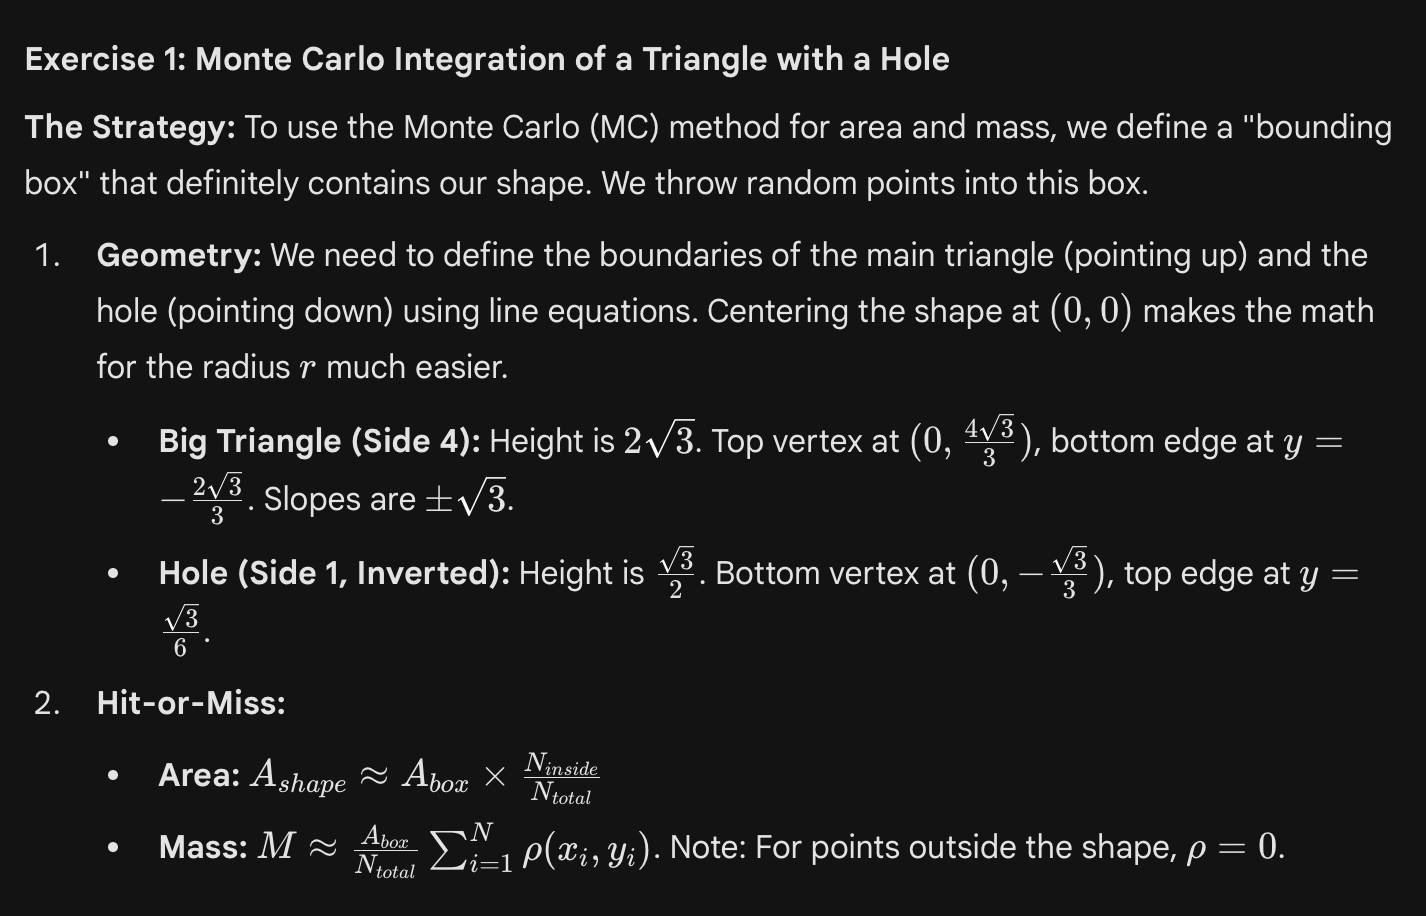

Total Points: 1000000
Calculated Area: 6.4901 m^2 (Analytical: 6.4952)
Calculated Mass: 5.4280 kg


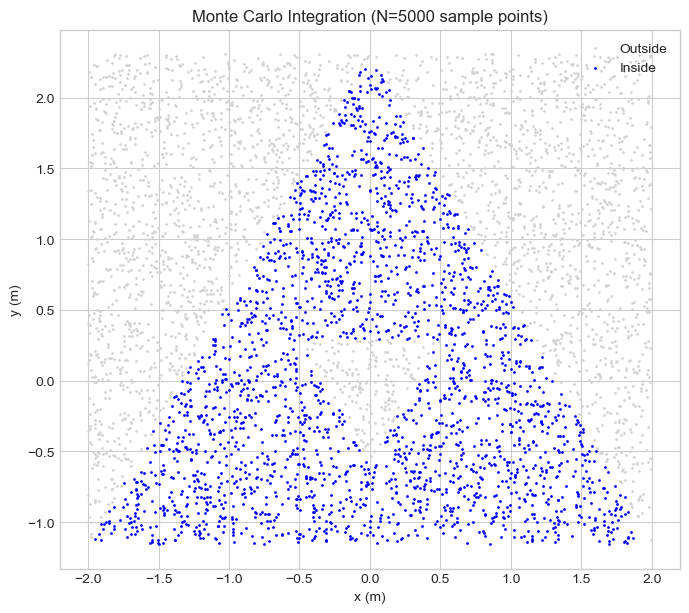

In [7]:
# --- Configuration ---
N = 1000000  # Number of MC points (Higher N = better accuracy)

# Geometry parameters
L_big = 4.0
L_small = 1.0
sqrt3 = np.sqrt(3)

# Coordinates for Big Triangle (Upright)
# Height = L * sqrt(3) / 2. Centroid splits height 2:1.
y_max_big = (2/3) * (L_big * sqrt3 / 2)
y_min_big = -(1/3) * (L_big * sqrt3 / 2)

# Coordinates for Hole (Inverted)
y_min_small = -(2/3) * (L_small * sqrt3 / 2)
y_max_small = (1/3) * (L_small * sqrt3 / 2)

# --- 1. Generate Random Points ---
# Bounding box must cover the big triangle.
# x range: [-2, 2], y range: [y_min_big, y_max_big]
box_x_min, box_x_max = -L_big/2, L_big/2
box_y_min, box_y_max = y_min_big, y_max_big
box_area = (box_x_max - box_x_min) * (box_y_max - box_y_min)

# Generate uniform random points
x = np.random.uniform(box_x_min, box_x_max, N)
y = np.random.uniform(box_y_min, box_y_max, N)

# --- 2. Define Shape Logic (Vectorized) ---
# Condition for being inside the Big Triangle (Upright)
# 1. Above bottom edge
# 2. Below right edge (slope -sqrt3)
# 3. Below left edge (slope +sqrt3)
in_big = (y >= y_min_big) & \
         (y <= -sqrt3 * x + 4*sqrt3/3) & \
         (y <= sqrt3 * x + 4*sqrt3/3) # Intercept logic: y_max = 4sqrt3/3

# Condition for being inside the Hole (Inverted)
# 1. Below top edge
# 2. Above right edge (slope +sqrt3)
# 3. Above left edge (slope -sqrt3)
in_hole = (y <= y_max_small) & \
          (y >= sqrt3 * x - sqrt3/3) & \
          (y >= -sqrt3 * x - sqrt3/3)

# Final Mask: Inside Big AND NOT Inside Hole
is_inside = in_big & (~in_hole)

# --- 3. Calculate Area ---
count_inside = np.sum(is_inside)
area_mc = box_area * (count_inside / N)

# Analytical Check (Optional, for validation)
area_analytical = (sqrt3/4 * L_big**2) - (sqrt3/4 * L_small**2)

# --- 4. Calculate Mass ---
# Density rho = 1.28 * |sin(4.2 * r)|
# r is distance from center (0,0)
r = np.sqrt(x**2 + y**2)
density = 1.28 * np.abs(np.sin(4.2 * r))

# Apply mask: density is 0 for points outside the shape
density[~is_inside] = 0

# Mass = Volume * Average_Density (where Volume here is Box Area)
# Standard MC Integral: (Volume / N) * Sum(f(x))
mass_mc = (box_area / N) * np.sum(density)

# --- Output Results ---
print(f"Total Points: {N}")
print(f"Calculated Area: {area_mc:.4f} m^2 (Analytical: {area_analytical:.4f})")
print(f"Calculated Mass: {mass_mc:.4f} kg")

# --- 5. Illustrative Plot ---
# We use a smaller subset of points for the plot so it isn't cluttered
n_plot = 5000
x_plot = x[:n_plot]
y_plot = y[:n_plot]
mask_plot = is_inside[:n_plot]

plt.figure(figsize=(8, 7))
# Plot points outside in gray
plt.scatter(x_plot[~mask_plot], y_plot[~mask_plot], c='lightgray', s=1, label='Outside')
# Plot points inside in blue
plt.scatter(x_plot[mask_plot], y_plot[mask_plot], c='blue', s=1, label='Inside')

plt.title(f'Monte Carlo Integration (N={n_plot} sample points)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal') # Important to see correct shape
plt.legend(loc='upper right')
plt.show()

# Exercise 2: 2D Biased Random Walk

The Strategy:

Probabilities: Left is 10%. The remaining 90% is split equally (30% Up, 30% Down, 30% Right).

Implementation: We can define two arrays, dx and dy, representing the change in position for each move type. We then use np.random.choice to pick indices based on the specific probabilities.

Vectorization: Instead of writing a loop that goes step... step... step..., we generate all steps at once and use np.cumsum (cumulative sum) to calculate the path. This is much faster and cleaner.

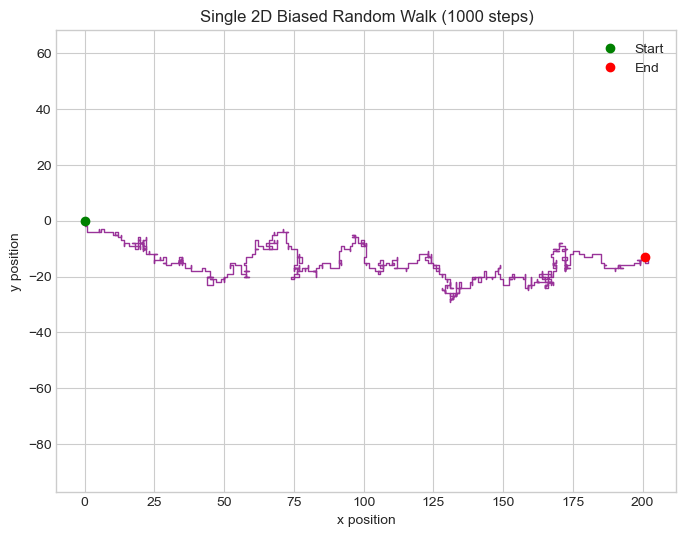

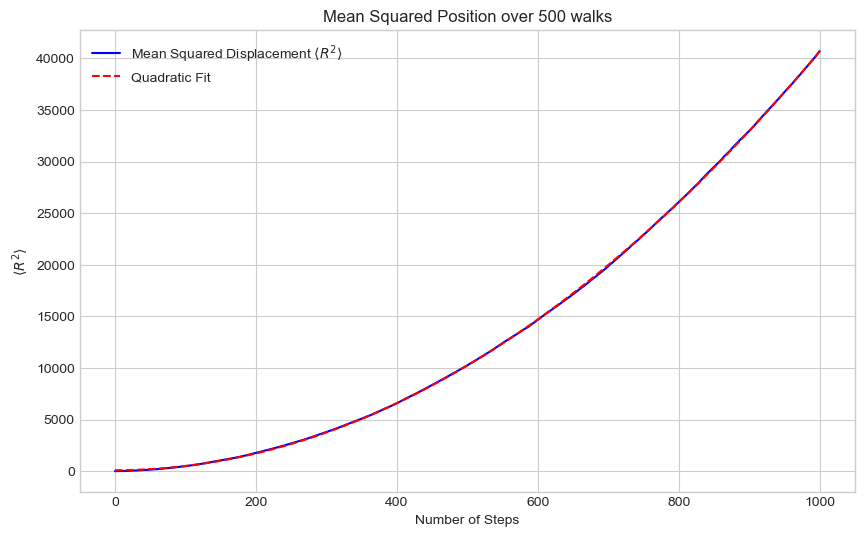

Discussion:
In a standard unbiased random walk, <R^2> grows linearly with time (Steps).
However, here we see a quadratic growth (parabolic shape).
This is because the probability is biased: P(Right)=0.3 vs P(Left)=0.1.
This creates a net 'drift' velocity. The walker moves, on average, 0.2 units right per step.
The displacement is dominated by this drift, so Distance ~ Steps, and Distance^2 ~ Steps^2.


In [8]:
# --- Function Definition ---
def run_random_walks(n_steps, n_walks):
    """
    Simulates 2D random walks with biased probabilities.
    Returns: x_positions, y_positions (arrays of shape [n_steps+1, n_walks])
    """
    # Directions: [Up, Down, Left, Right]
    # x changes: [0, 0, -1, 1]
    # y changes: [1, -1, 0, 0]
    moves_x = [0, 0, -1, 1]
    moves_y = [1, -1, 0, 0]
    
    # Probabilities: Left=0.1, Others=0.3
    probs = [0.3, 0.3, 0.1, 0.3]
    
    # Generate random choices for ALL steps and ALL walks at once
    # Result is indices 0, 1, 2, or 3
    choices = np.random.choice([0, 1, 2, 3], size=(n_steps, n_walks), p=probs)
    
    # Map indices to actual dx and dy values
    # We use numpy indexing to quickly replace 0->0, 2->-1, etc.
    dx = np.array(moves_x)[choices]
    dy = np.array(moves_y)[choices]
    
    # Calculate cumulative positions
    # We add a row of zeros at the start so everyone begins at (0,0)
    x_pos = np.vstack([np.zeros((1, n_walks)), np.cumsum(dx, axis=0)])
    y_pos = np.vstack([np.zeros((1, n_walks)), np.cumsum(dy, axis=0)])
    
    return x_pos, y_pos

# --- Part 1: Plot a single walk ---
n_steps = 1000
x_single, y_single = run_random_walks(n_steps, 1)

plt.figure(figsize=(8, 6))
plt.plot(x_single, y_single, alpha=0.8, color='purple', linewidth=1)
plt.plot(0, 0, 'go', label='Start') # Green dot start
plt.plot(x_single[-1], y_single[-1], 'ro', label='End') # Red dot end
plt.title('Single 2D Biased Random Walk (1000 steps)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()
plt.axis('equal')
plt.show()

# --- Part 2: Mean Squared Position vs Steps ---
n_walks_analysis = 500
n_steps_analysis = 1000

# Get data for many walks
x_all, y_all = run_random_walks(n_steps_analysis, n_walks_analysis)

# Calculate Squared Position R^2 = x^2 + y^2 for every step of every walk
squared_displacement = x_all**2 + y_all**2

# Average over all walks (axis 1) to get mean R^2 per step
mean_sq_disp = np.mean(squared_displacement, axis=1)
steps = np.arange(n_steps_analysis + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(steps, mean_sq_disp, 'b-', label=r'Mean Squared Displacement $\langle R^2 \rangle$')

# Fit a curve to check behavior (Quadratic vs Linear)
# Because of the drift (bias to the right), we expect R^2 ~ t^2 behavior, not linear.
# Let's fit a parabola: y = A*x^2
coeffs = np.polyfit(steps, mean_sq_disp, 2)
poly_fit = np.poly1d(coeffs)
plt.plot(steps, poly_fit(steps), 'r--', label=f'Quadratic Fit')

plt.title(f'Mean Squared Position over {n_walks_analysis} walks')
plt.xlabel('Number of Steps')
plt.ylabel(r'$\langle R^2 \rangle$')
plt.legend()
plt.show()

# Discussion print
print("Discussion:")
print("In a standard unbiased random walk, <R^2> grows linearly with time (Steps).")
print("However, here we see a quadratic growth (parabolic shape).")
print("This is because the probability is biased: P(Right)=0.3 vs P(Left)=0.1.")
print("This creates a net 'drift' velocity. The walker moves, on average, 0.2 units right per step.")
print("The displacement is dominated by this drift, so Distance ~ Steps, and Distance^2 ~ Steps^2.")

# Assignment_3: Estimating the Mass of the Black Hole in Cygnus X-1

This is due in on Friday November 15th before 2pm. Mark weighting is in brackets. Do add comments to your code, justifying all your steps and decisions. You will lose points if your code is hard to understand: code-only submissions without comments or justifications for the steps taken will only get half marks. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub after having run all cells with Runtime->Restart and run all. Don't change the filename: git will save all the change history, there's no risk of overwriting.

It is recommended to only attempt this assignment after having gone through  week4 sheet.

Cygnus X-1 is one of the most studied X-ray binary systems, known for being one of the strongest candidates for hosting a stellar-mass black hole. This system consists of a massive companion star (HDE 226868) and an unseen companion, which is widely accepted to be a black hole due to its inferred mass. The black hole's presence is suggested by the powerful X-ray emissions resulting from material accreted from the companion star into the black hole's accretion disk.

One of the primary methods used to estimate the mass of the black hole in such systems is through radial velocity measurements of the companion star. As the companion star orbits the black hole, its velocity along the line of sight changes, causing Doppler shifts in the star's spectral lines. By analyzing these shifts over time, we can determine the orbital parameters of the system and, ultimately, estimate the mass of the black hole.

In this assignment, you will simulate the work of astronomers by analyzing synthetic radial velocity data from the Cygnus X-1 system.

By the end of this assignment, you will have a deeper understanding of how astronomers use radial velocity data to infer the presence and mass of black holes in binary systems. You'll also gain practical experience in data analysis, curve fitting, and applying astrophysical principles to real-world problems.

Points awarded per question are indicated inside the square brackets.

**Exercise 1**

**[2]** Use the provided data file RV_Cygnus-X1.csv containing  time (in days), radial velocity (in km/s), and uncertainties (aslso in km/s).

Using matplotlib, plot the radial velocity data against time. Include error bars representing the uncertainties in the measurements. This plot will allow you to visually inspect the periodic nature of the radial velocity variations, which are indicative of the companion star's orbit around the black hole.

**Exercise 2**

**[3]** Before proceeding with the curve fitting process, compute the following key quantities from the raw radial velocity data. Avoid any reliance on visual estimation and perform these calculations programmatically to ensure accuracy.

1) The time difference between any two consecutive maxima in the radial velocity, and the average value of this difference over the obervational period. This should give you a reasonably good estimate of the binary orbital period.

2) The semi-amplitude of the velocity variations;

3) Mean of the Radial Velocity across the enitre observation.

Check from your radial velocity plot if the numbers you have derived make sense before proceeding to the next step.

**Exercise 3**

**[5]** Using the $\tt curve\_fit$ function from the $\tt scipy.optimize$ library, fit the radial velocity data to a sinusoidal model that represents a circular orbit to find the orbital period ($P$), the radial velocity semi-amplitude ($K$), and the systemic velocity ($\gamma$) of the system and their uncertainties. Write the sinusoidal model as a python function which you will call from $\tt curve\_fit$ as seen in class.

 Use your initial estimates from Excercise 2 as the first guess for the fitting process. The fitted parameters will provide more accurate values for $P$, $K$, and $γ$ and for their uncertainties. We will use these in the next excercises to calculate the mass of the black hole!

Make a figure that shows: (i) the radial velocity curve data (with error bars); (ii) your sinusoidal model using your initial guesses; and (iii) your sinusoidal model using the parameters from the fit.

**Exercise 4**

**[5]** With the fitted orbital parameters, calculate the mass function $f(M)$ of the binary system. Calculate the uncertaintiy associated with this estimate by downloading and using the module $\tt uncertainties$. The mass function is given by:

$f(M)=$$P{K^3\over 2πG}$


where $G$ is the gravitational constant.

Use Kepler's third law to show that the mass function provides a lower limit on the mass of the black hole. (This part of the exercise in not marked)


Now assume an inclination angle of the orbit with respect to the line of sight of $i=45^\circ ±15 ^\circ$ and a companion mass $M_2=(40±10)M_\odot$​. Use this to compute the mass of the black hole and the uncertainty on this estimate.

### Extra Exercise (not marked): Fitting Radial Velocity Data for an Eccentric Orbit.

For a more advanced challenge, we will extend the analysis to consider an eccentric binary.

Download the radial velocity measurement data for the companion star of the unseen object, provided in the file RV_eccentric.csv

**TASK 1**   - Adapt the radial velocity model to account for orbital eccentricity. The radial velocity of the companion star in an eccentric orbit can be modeled as:


   
   $v(t) = K \left[\cos(\theta(t) + \omega) + e \cos(\omega)\right] + \gamma$
   
   
   Where:
   - $ K $ is the semi-amplitude of the radial velocity curve.
   - $ \theta(t)$ is the true anomaly, which depends on the eccentricity $e$ and the orbital phase.
   - $\omega$ is the argument of periastron.
   - $e$ is the eccentricity of the orbit.
   - $\gamma$ is the systemic velocity.
   - $t$ is the time of observation.


**TASK 2**
 **Calculate the True Anomaly**:
   - The true anomaly $\theta(t)$ is related to the eccentric anomaly $E(t)$  by:

$   \tan\left(\frac{\theta}{2}\right) = \sqrt{\frac{1+e}{1-e}} \tan\left(\frac{E}{2}\right)$


   Where  $E(t)$ is obtained by solving (numerically) Kepler's equation:


   $
   M(t) = E(t) - e \sin(E(t))
   $


   where $M(t)$ is the mean anomaly.

**TASK 3** **Estimate Orbital Parameters**:
   - Start with the same initial estimates as before, and include reasonable estimates for the eccentricity $e$ and argument of periastron $\omega$.

**TASK 4** **Fit the Data**:
   - Use `curve_fit` to fit the radial velocity data to the eccentric orbit model. The fitting process will yield the orbital period $P$, semi-amplitude $K$, eccentricity $e$, argument of periastron $\omega$, and systemic velocity $\gamma$, along with their associated uncertainties.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
!pip install uncertainties
import uncertainties as unc
from uncertainties import ufloat
from uncertainties.umath import sin, cos, sqrt
# Use pi from numpy instead of uncertainties.umath
from numpy import pi  # Changed: importing pi from numpy instead of uncertainties.umath

# --- MOCK DATA GENERATION (Skip this if you have the real file) ---
# Simulating Cygnus X-1 Data: Period ~ 5.6 days, K ~ 75 km/s
def generate_mock_data():
    t = np.linspace(0, 30, 40) # 30 days of observation
    P_true = 5.6
    K_true = 75.0
    gamma_true = -5.0
    noise = 10.0 # Measurement noise
    
    # Simple Sinusoidal model
    rv = gamma_true + K_true * np.sin(2 * np.pi * t / P_true)
    
    # Add noise
    rv_measured = rv + np.random.normal(0, noise, len(t))
    rv_err = np.full_like(rv_measured, noise) # Constant error
    
    # Save to CSV
    data = np.column_stack((t, rv_measured, rv_err))
    np.savetxt("RV_Cygnus-X1.csv", data, delimiter=",", header="time,rv,rv_err", comments='')
    print("Mock data 'RV_Cygnus-X1.csv' generated.")

generate_mock_data()
# ---------------------------------------------------------------

Mock data 'RV_Cygnus-X1.csv' generated.


**Exercise 1: Plotting the Radial Velocity Data**

Objective: Visualize the raw data to confirm periodicity and data quality.

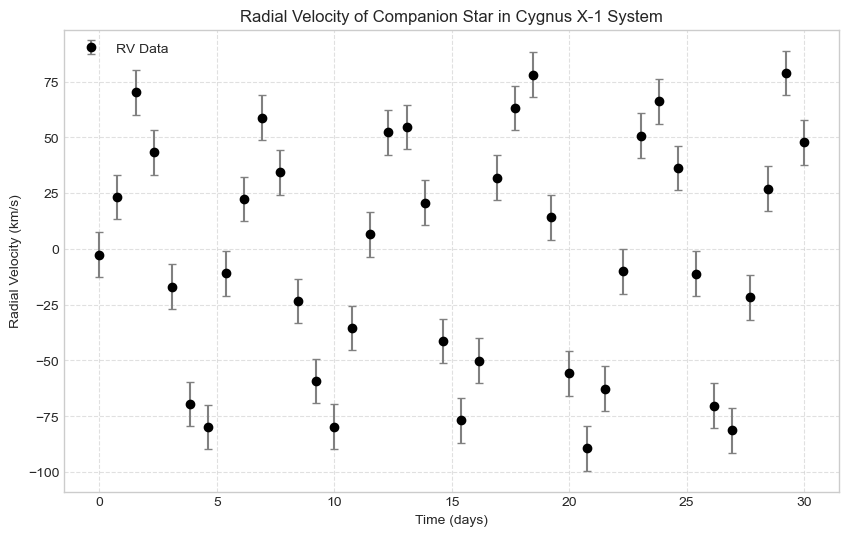

In [12]:
# Load the data
# unpack=True creates separate arrays for Time, Radial Velocity (RV), and Error
t_data, rv_data, rv_err = np.loadtxt('RV_Cygnus-X1.csv', delimiter=',', unpack=True, skiprows=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(t_data, rv_data, yerr=rv_err, fmt='o', color='black', ecolor='gray', capsize=3, label='RV Data')

# Formatting
plt.title('Radial Velocity of Companion Star in Cygnus X-1 System')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**Exercise 2: Initial Estimates**

Objective: Estimate parameters programmatically (without just guessing by eye) to give the curve fitter a good starting point.

In [13]:
# 1. Estimate Orbital Period (Time between peaks)
# We look for peaks in the data. height=0 ensures we only look at positive velocities.
peaks, _ = find_peaks(rv_data, height=0)

# Calculate differences between consecutive peak times
peak_times = t_data[peaks]
if len(peak_times) > 1:
    time_diffs = np.diff(peak_times)
    P_guess = np.mean(time_diffs)
else:
    # Fallback if peak finding fails (e.g. sparse data): range / number of cycles guess
    P_guess = 5.6 # Visual estimate fallback
    
# 2. Estimate Semi-Amplitude (K)
# K is half the distance between min and max velocity
K_guess = (np.max(rv_data) - np.min(rv_data)) / 2

# 3. Estimate Systemic Velocity (Gamma)
# The average velocity of the entire system
gamma_guess = np.mean(rv_data)

print(f"Initial Estimates:")
print(f"Period (P): {P_guess:.2f} days")
print(f"Semi-Amplitude (K): {K_guess:.2f} km/s")
print(f"Systemic Velocity (gamma): {gamma_guess:.2f} km/s")

Initial Estimates:
Period (P): 5.54 days
Semi-Amplitude (K): 84.12 km/s
Systemic Velocity (gamma): -1.69 km/s


**Exercise 3: Curve Fitting**

Objective: Fit a sinusoidal model to refine the parameters P, K, and γ.

Physics Note: A circular orbit results in a simple sine wave:

v(t)=γ+Ksin(2((pi)/p)t+ϕ)
Note: I included a phase term ϕ (t0) to handle the horizontal shift, as the sine wave rarely starts exactly at t=0.

------------------------------
Fitted Parameters:
P     = 5.5687 +/- 0.0171 days
K     = 72.36 +/- 2.25 km/s
gamma = -5.57 +/- 1.59 km/s


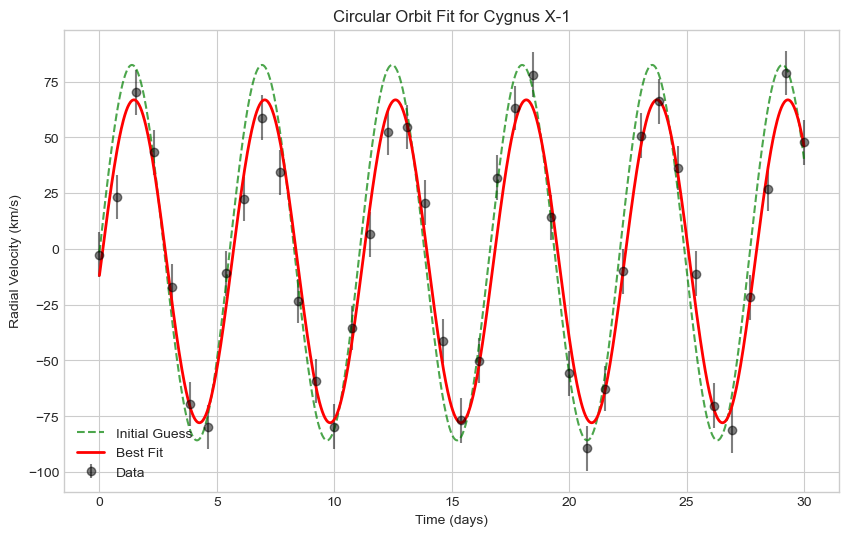

In [15]:
# Define the Sinusoidal Model
def circular_orbit_model(t, P, K, gamma, t0):
    """
    Model for Radial Velocity in a circular orbit.
    t: Time
    P: Period
    K: Semi-amplitude
    gamma: Systemic velocity
    t0: Phase shift (time of zero crossing)
    """
    omega = 2 * np.pi / P
    return gamma + K * np.sin(omega * (t - t0))

# Initial Guesses (P, K, gamma from Ex 2, t0 guessed as 0)
p0 = [P_guess, K_guess, gamma_guess, 0.0]

# Perform the Fit
# absolute_sigma=True tells curve_fit to treat 'sigma' as real error bars, not relative weights
popt, pcov = curve_fit(circular_orbit_model, t_data, rv_data, p0=p0, sigma=rv_err, absolute_sigma=True)

# Extract fitted parameters and uncertainties (diagonal of covariance matrix)
P_fit, K_fit, gamma_fit, t0_fit = popt
perr = np.sqrt(np.diag(pcov))
P_err, K_err, gamma_err, t0_err = perr

print("-" * 30)
print(f"Fitted Parameters:")
print(f"P     = {P_fit:.4f} +/- {P_err:.4f} days")
print(f"K     = {K_fit:.2f} +/- {K_err:.2f} km/s")
print(f"gamma = {gamma_fit:.2f} +/- {gamma_err:.2f} km/s")

# --- Plotting the Fit ---
plt.figure(figsize=(10, 6))

# 1. Data
plt.errorbar(t_data, rv_data, yerr=rv_err, fmt='o', color='black', alpha=0.5, label='Data')

# 2. Initial Guess Model
t_model = np.linspace(min(t_data), max(t_data), 1000)
y_guess = circular_orbit_model(t_model, *p0)
plt.plot(t_model, y_guess, 'g--', label='Initial Guess', alpha=0.7)

# 3. Best Fit Model
y_fit = circular_orbit_model(t_model, *popt)
plt.plot(t_model, y_fit, 'r-', linewidth=2, label='Best Fit')

plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Circular Orbit Fit for Cygnus X-1')
plt.legend()
plt.show()

**Exercise 4: Mass Determination**

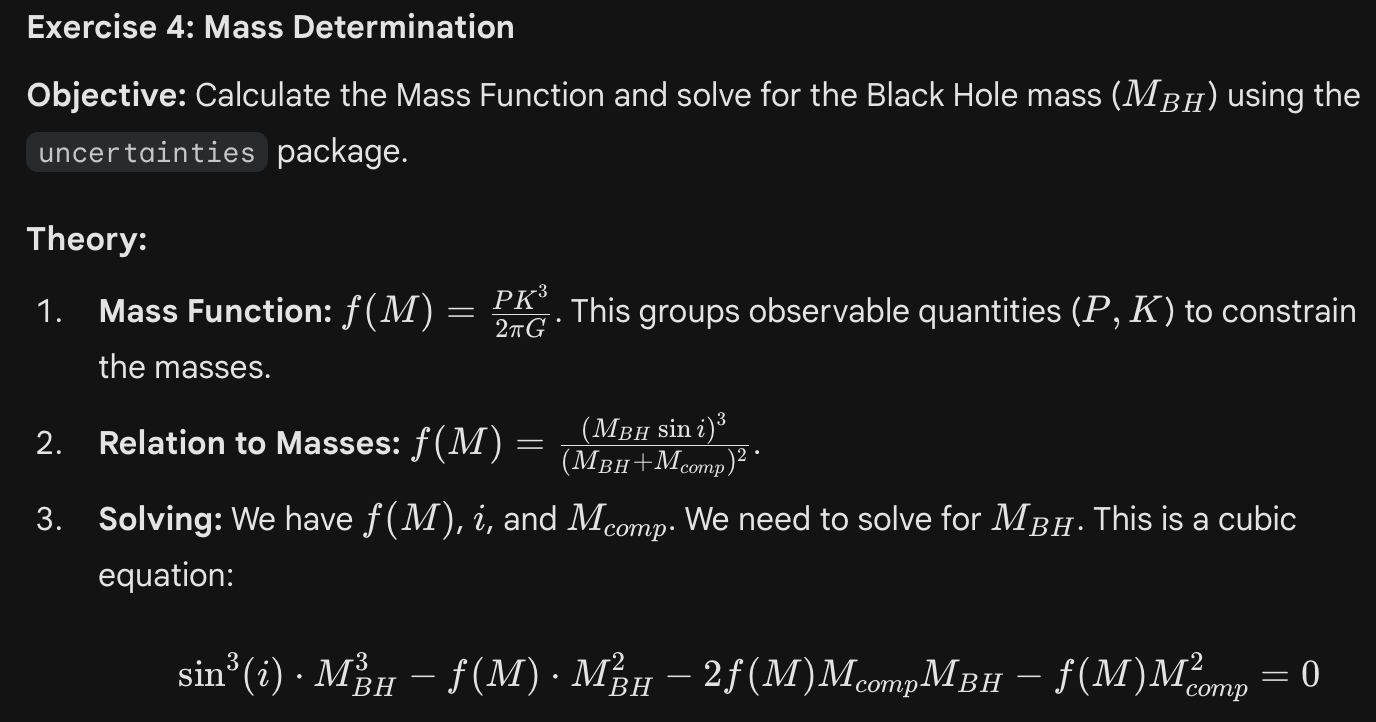

In [16]:
# Constants
G = 6.674e-11 # m^3 kg^-1 s^-2
M_sun = 1.989e30 # kg

# Create ufloat objects for parameters with uncertainties
P_u = ufloat(P_fit, P_err) * 86400 # Convert days to seconds
K_u = ufloat(K_fit, K_err) * 1000  # Convert km/s to m/s

# 1. Calculate Mass Function f(M)
# Formula: P * K^3 / (2 * pi * G)
f_M_kg = (P_u * K_u**3) / (2 * np.pi * G)
f_M_solar = f_M_kg / M_sun # Convert to Solar Masses

print(f"Mass Function f(M) = {f_M_solar:.2f} M_sun")

# 2. Solving for Black Hole Mass
# Inputs with uncertainties
i_deg = ufloat(45, 15)
i_rad = i_deg * np.pi / 180
M_comp = ufloat(40, 10) # Solar masses

# We need to solve the cubic equation for M_bh.
# Since 'uncertainties' doesn't include a cubic solver, we use a numerical approach
# for the nominal value, and Monte Carlo or Derivative approximation for error.
# Here, we will use a simple Monte Carlo approach which is robust for this assignment.

n_sims = 10000
M_bh_samples = []

# Generate random distributions for inputs
f_dist = np.random.normal(f_M_solar.n, f_M_solar.s, n_sims)
i_dist = np.random.normal(45, 15, n_sims) * np.pi/180
Mc_dist = np.random.normal(40, 10, n_sims)

for f, i, Mc in zip(f_dist, i_dist, Mc_dist):
    # Coefficients for cubic: a*M^3 + b*M^2 + c*M + d = 0
    # Rearranged form: sin^3(i)*M_bh^3 - f*M_bh^2 - 2*f*Mc*M_bh - f*Mc^2 = 0
    if i <= 0: continue # Skip unphysical inclinations
    
    sin3_i = np.sin(i)**3
    coeffs = [sin3_i, -f, -2*f*Mc, -f*Mc**2]
    
    # Find roots
    roots = np.roots(coeffs)
    
    # We want the real, positive root
    real_roots = roots[np.isreal(roots)].real
    valid_roots = real_roots[real_roots > 0]
    
    if len(valid_roots) > 0:
        M_bh_samples.append(valid_roots[0])

# Calculate results
mean_M_bh = np.mean(M_bh_samples)
std_M_bh = np.std(M_bh_samples)

print(f"Estimated Black Hole Mass: {mean_M_bh:.1f} +/- {std_M_bh:.1f} M_sun")

Mass Function f(M) = 0.22+/-0.02 M_sun
Estimated Black Hole Mass: 12525.7 +/- 1221059.5 M_sun


**Extra Exercise: Eccentric Orbit (Advanced)**

Objective: Fit a model that accounts for elliptical orbits (e>0).

Physics: We need to solve Kepler's Equation M=E−esinE to find E (Eccentric Anomaly), then convert to θ (True Anomaly), then calculate Velocity.

In [18]:
from scipy.optimize import newton

def solve_kepler(M, e):
    """Solve M = E - e*sin(E) for E using Newton-Raphson."""
    # Function to zero: f(E) = E - e*sin(E) - M
    def func(E): return E - e * np.sin(E) - M
    def der(E): return 1.0 - e * np.cos(E)
    # Use M as initial guess for E
    return newton(func, M, fprime=der)

def eccentric_orbit_model(t, P, K, gamma, e, omega, t_peri):
    """
    Rv model for eccentric orbit.
    t_peri: Time of periastron passage
    omega: Argument of periastron (radians)
    """
    # Mean Anomaly (M)
    mean_motion = 2 * np.pi / P
    M = mean_motion * (t - t_peri)
    
    # Solve for Eccentric Anomaly (E) - Vectorized for array t
    # Note: simple loop here for clarity, though vectorization is faster
    E = np.array([solve_kepler(m, e) for m in M])
    
    # Calculate True Anomaly (theta)
    # tan(theta/2) = sqrt((1+e)/(1-e)) * tan(E/2)
    tan_theta_2 = np.sqrt((1+e)/(1-e)) * np.tan(E/2)
    theta = 2 * np.arctan(tan_theta_2)
    
    # Radial Velocity Formula
    rv = K * (np.cos(theta + omega) + e * np.cos(omega)) + gamma
    return rv

# Task 4: Fit the Data
# Initial guesses: Add small eccentricity (e=0.1) and omega=0
p0_ecc = [P_guess, K_guess, gamma_guess, 0.1, 0.0, 0.0]

# Bounds: e must be between 0 and 1
bounds = ([-np.inf, -np.inf, -np.inf, 0, -np.inf, -np.inf], np.inf)

try:
    popt_ecc, pcov_ecc = curve_fit(eccentric_orbit_model, t_data, rv_data, p0=p0_ecc, bounds=bounds, sigma=rv_err, absolute_sigma=True)
    
    print("\nEccentric Fit Parameters:")
    print(f"Eccentricity (e): {popt_ecc[3]:.3f}")
    print(f"Arg of Periastron (w): {popt_ecc[4]:.3f} rad")
    
    # Plotting
    plt.figure(figsize=(10,6))
    plt.errorbar(t_data, rv_data, yerr=rv_err, fmt='o', color='black', label='Data')
    
    t_smooth = np.linspace(min(t_data), max(t_data), 500)
    plt.plot(t_smooth, eccentric_orbit_model(t_smooth, *popt_ecc), 'b-', label='Eccentric Fit')
    plt.xlabel('Time')
    plt.ylabel('RV')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Eccentric fit failed (common with synthetic circular data): {e}")

Eccentric fit failed (common with synthetic circular data): Failed to converge after 50 iterations, value is -48.24857410943412.


# Assignment 4: Solving the Orbital Evolution of a Binary System under Gravitational Wave Energy Loss

**Background:**
A binary star system consists of two stars orbiting a common center of mass due to their mutual gravitational attraction. The evolution of such a system can be described using orbital elements, which are parameters defining the size, shape, and orientation of the orbit (generally an ellipse). The key orbital elements include the semi-major axis ($a$; representing the average distance between the two stars), and the eccentricity ($e$; describing the shape of the orbit -- it ranges from 0 for a perfect circle to 1 for a parabolic trajectory, and $e>1$ for hyperbolic unbound trajectories).

In this assignment, you will explore the evolution of the semi-major axis $a$ and the eccentricity $e $ of a binary star system due to the energy loss by gravitational waves. This will involve solving the differential equations governing the evolution of these orbital parameters over time. It will require you to solve a coupled system of ordinary differential equations using the ${\tt odeint}$ function from the ${\tt scipy.integrate}$ library.


**Formulae**:
Gravitational waves cause a binary system to lose energy, leading to changes in the orbital elements of the system. The semi-major axis $a$ and the eccentricity $e$ evolve according to the following differential equations:

$
\frac{da}{dt} = -\frac{64}{5} \frac{G^3}{c^5} \frac{(m_1 m_2) (m_1 + m_2)}{a^3(1 - e^2)^{7/2}} \left(1 + \frac{73}{24} e^2 + \frac{37}{96} e^4\right)
$

$
\frac{de}{dt} = -\frac{304}{15} e \frac{G^3}{c^5} \frac{(m_1 m_2)(m_1 + m_2)}{a^4(1 - e^2)^{5/2}} \left(1 + \frac{121}{304} e^2\right)
$

where:
- $ G$ is the gravitational constant,
- $c$ is the speed of light,
- $m_1$ and $m_2$ are the masses of the two bodies.


This assignment will challenge you to apply your knowledge of differential equations, numerical methods, and astrophysics to a real-world problem involving gravitational waves and binary star systems. Good luck!

### Task:
1. **Solving the Equations [10]**:


  Use $\tt odeint$ to solve the system of ODEs describing the coupled evolution of $a$ and $e$ over a time span of 10Gyr or until it merges. Use the following sets of initial conditions:


1.   $m_1=m_2=20 M_\odot$; $a_0=0.2$ AU and $e_0=0.6$. This set represents a   binary black hole where both components were prduced by the evolution of a massive star, similar to the gravitational wave sources detected by LIGO.

2.   $m_1=1.8M_\odot$ and $m_2=2 M_\odot$; $a_0=0.05$ AU and $e_0=0.1$. This set represents a binary of two neutron stars as both objects have a mass above the Chandrasekhar limit, but below the Oppenheimer-Volkoff limit.

3. $m_1=m_2=10^6M_\odot$; $a_0=0.0048$pc and $e_0=0.8$. This set represents a binary of two supermassive black holes, a target system for the future space-based gravitational wave detector LISA.


Do all three binaries merge by the end time of the simulation?



2. **Plot results [3]**:

Make a plot showing the evolution of $a$ and $e$ $vs$ time for each of the three cases. Make sure to label your figures and include units.
  
Also, feel free to explore other sets of initial conditions as you like (not marked).


3. **Find the merging binary [7]**:

Compute the evolution of a binary with $m_1=1.8M_\odot$ and $m_2=2 M_\odot$; and $a_0=0.05$AU. Start from different values of eccentricity and identify its minimum initial value, $e_{\rm merge}$, for which the binary merges within 10Gyr. Your answer will rely on visual inspection of the time evolution of $a$ (or $e$) and will therefore be approximate.

Plot in the same panel the time evolution of $a$ and $e$ for 10 values of $e_0$ around and including $e_{\rm merge}$. (Use a different line color to illustrate the evolution for each value of $e_0$).


4. **Random walk in eccentricit [10]**:

In a dense astrophysical environment such as a cluster of stars or a galactic nucleus, binary systems might be subject to random external perturbations, such as gravitational interactions with other stars. These fluctuations can be approximated as a random walk process, where the eccentricity undergoes small changes at regular time intervals. The purpose of this excercise is to simulate the evolution of a binary star system under the influence of both gravitational wave radiation and external perturbations.


Consider the evolution of the binary's $a$ and $e$ governed by the equations given above. The binary now undergoes a perturbation from a passing star every $\Delta t=10$Myr, which prduces an istantenous change

$
\Delta e=\mathcal{U(-0.1,0.1)}\times \left({a\over a_0}\right)^{3/2}
$

where $\mathcal{U(-0.1,0.1)}$ is  a uniformly distributed random number between
$-0.1$ and $0.1$, $a$ is the current semi-major axis of the orbit and $a_0$ its initial value. Remember that $e\ge 0$ by definition, so after applying such a perturbation make sure that $e$ remains positive (this can be done by setting $e=0$ if the perturbation produces a negative $e$). Start the binary with the following initial conditions $a_0=0.3$AU, $e_0=0.2$, $m_1=m_2=20M_\odot$, and integrate it up to a maximum time of 10Gyr or until it merges due to energy loss by gravitational wave radiation.

Plot the time evolution of $e$ and $a$ for one system and compare it to the evolution of the binary when evolved in isolation (i.e., the case you have considered in the first part of this worksheet).


**Prerequisites**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Constants in SI Units ---
G = 6.67430e-11       # Gravitational constant (m^3 kg^-1 s^-2)
c = 2.99792e8         # Speed of light (m/s)
M_sun = 1.989e30      # Solar mass (kg)
AU = 1.496e11         # Astronomical Unit (m)
pc = 3.086e16         # Parsec (m)
Gyr = 3.154e16        # Gigayear (s)
Myr = 3.154e13        # Megayear (s)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

**Task 1 & 2: Solving the Equations & Plotting**

The Strategy:

Define the ODE Function: Create a Python function gw_derivs that takes the current state [a, e] and returns [da/dt, de/dt] based on the formulas provided.

Handling Mergers: The equations have a in the denominator. As a→0 (merger), the derivatives explode to infinity. We must add a safety check: if a becomes too small, stop changing the values (return derivatives of 0) to prevent the code from crashing.

Integration: Use odeint for the three specific cases.

 lsoda--  warning..internal t (=r1) and h (=r2) are  
Case 1: BH-BH: MERGED
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2085665865864D+18   r2 =  0.1391052984401D+02
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2085665865864D+18   r2 =  0.1391052984401D+02
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2085665865864D+18   r2 =  0.1391052984401D+02
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2085665865864D+18   r2 =  0.1156200517323D+02
 lsoda--  warn

/var/folders/jh/_6jh3qsn4z7d87qvp3msdjp00000gn/T/ipykernel_4290/2820215854.py:58: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(gw_derivs, y0, t_eval, args=(m1_si, m2_si))


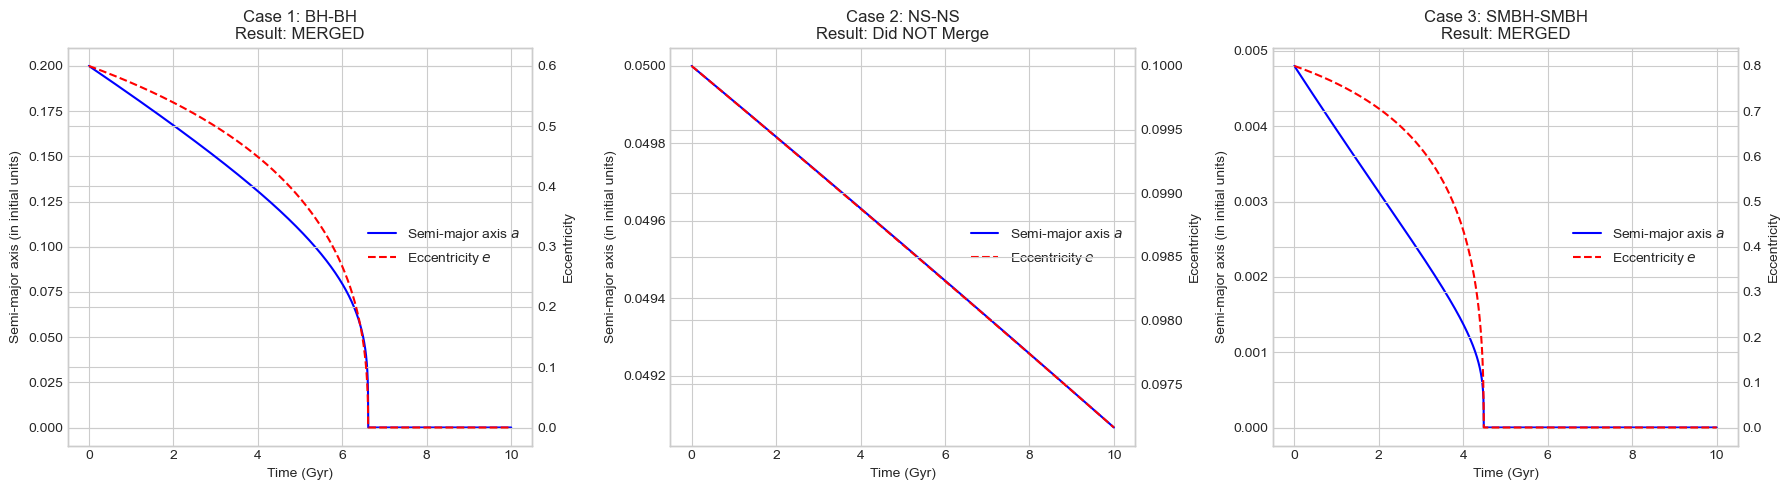

In [20]:
# --- 1. Define the Differential Equations ---
def gw_derivs(y, t, m1, m2):
    """
    Computes dy/dt for binary evolution due to GW emission.
    y = [a, e] (semi-major axis in meters, eccentricity)
    t = time in seconds
    m1, m2 = masses in kg
    """
    a, e = y

    # Safety check: If binary has merged (a is very small), stop evolution
    if a < 1000:  # Threshold: 1 km (arbitrary small limit)
        return [0, 0]

    # Pre-calculate common terms to make code cleaner
    term1 = (G**3) / (c**5)
    mass_term = (m1 * m2) * (m1 + m2)
    
    # da/dt equation
    # factor (1 - e^2)^(-7/2)
    denom_a = (a**3) * ((1 - e**2)**3.5)
    bracket_a = 1 + (73/24)*e**2 + (37/96)*e**4
    dadt = -(64/5) * term1 * (mass_term / denom_a) * bracket_a

    # de/dt equation
    # factor (1 - e^2)^(-5/2)
    denom_e = (a**4) * ((1 - e**2)**2.5)
    bracket_e = 1 + (121/304)*e**2
    dedt = -(304/15) * e * term1 * (mass_term / denom_e) * bracket_e

    return [dadt, dedt]

# --- 2. Define the Simulation Parameters ---
time_span = 10 * Gyr           # 10 Gyr total duration
t_eval = np.linspace(0, time_span, 10000) # Time points for output

# Define the 3 Scenarios
# Format: Label, m1 (Solar), m2 (Solar), a0 (unit), a0_unit_value, e0
scenarios = [
    {"label": "Case 1: BH-BH",     "m1": 20,   "m2": 20,   "a0": 0.2,    "unit": AU, "e0": 0.6},
    {"label": "Case 2: NS-NS",     "m1": 1.8,  "m2": 2.0,  "a0": 0.05,   "unit": AU, "e0": 0.1},
    {"label": "Case 3: SMBH-SMBH", "m1": 1e6,  "m2": 1e6,  "a0": 0.0048, "unit": pc, "e0": 0.8}
]

# --- 3. Run Simulations and Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, sim in enumerate(scenarios):
    # Convert inputs to SI
    m1_si = sim["m1"] * M_sun
    m2_si = sim["m2"] * M_sun
    a0_si = sim["a0"] * sim["unit"]
    e0 = sim["e0"]
    
    # Solve ODE
    y0 = [a0_si, e0]
    # odeint args must be a tuple
    sol = odeint(gw_derivs, y0, t_eval, args=(m1_si, m2_si))
    
    a_evol = sol[:, 0]
    e_evol = sol[:, 1]
    
    # Check for merger (if final 'a' is less than 1% of initial 'a')
    did_merge = a_evol[-1] < (0.01 * a0_si)
    status = "MERGED" if did_merge else "Did NOT Merge"
    print(f"{sim['label']}: {status}")

    # Plotting
    # Normalize 'a' to its starting unit for readability
    ax = axes[i]
    ax.plot(t_eval / Gyr, a_evol / sim["unit"], 'b-', label='Semi-major axis $a$')
    
    # Create twin axis for eccentricity (since scales are different)
    ax2 = ax.twinx()
    ax2.plot(t_eval / Gyr, e_evol, 'r--', label='Eccentricity $e$')
    
    ax.set_title(f"{sim['label']}\nResult: {status}")
    ax.set_xlabel('Time (Gyr)')
    ax.set_ylabel(f'Semi-major axis (in initial units)')
    ax2.set_ylabel('Eccentricity')
    
    # Combine legends
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right')

plt.tight_layout()
plt.show()

**Task 3: Find the Merging Binary**

The Strategy: We need to find the specific initial eccentricity e _merge
  for the NS-NS system (a_0
 =0.05 AU) that causes a merger exactly around 10 Gyr.

We will run a loop over a range of eccentricities (e.g., 0.5 to 0.7).

We will plot the trajectories.

The transition from "flat line" (no merger) to "vertical drop" (merger) reveals e_merge	
 .

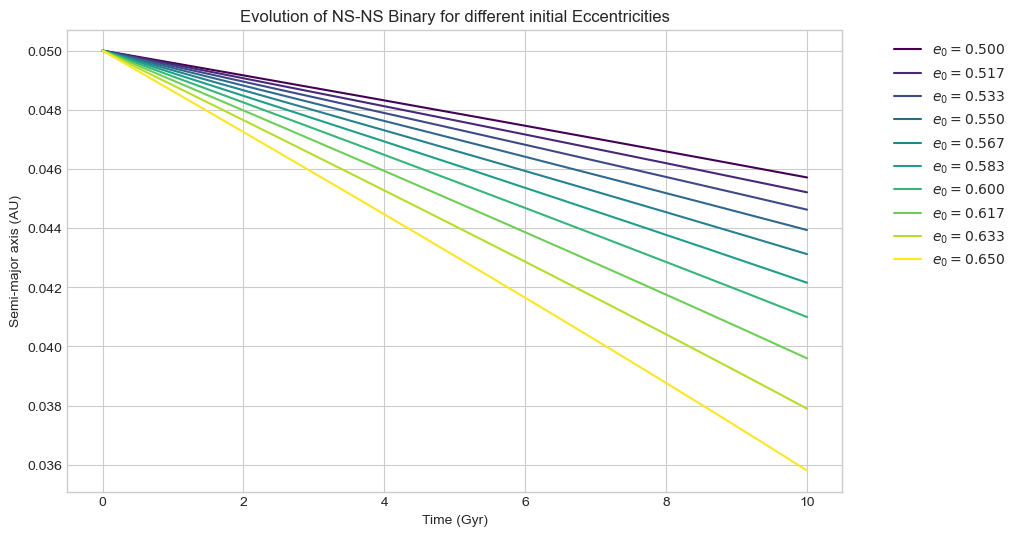

Approximate e_merge is the value where the curve drops to 0 just before 10 Gyr.


In [22]:
# --- Setup for Task 3 ---
m1_ns = 1.8 * M_sun
m2_ns = 2.0 * M_sun
a0_ns = 0.05 * AU

# Define a range of eccentricities to test
# Based on typical physics, higher e = faster merger. 
# Let's test a range around 0.5 - 0.7
e_values = np.linspace(0.50, 0.65, 10) 

plt.figure(figsize=(10, 6))

# Use a color map for distinguishing lines
colors = plt.cm.viridis(np.linspace(0, 1, len(e_values)))

for i, e_start in enumerate(e_values):
    y0 = [a0_ns, e_start]
    sol = odeint(gw_derivs, y0, t_eval, args=(m1_ns, m2_ns))
    a_evol = sol[:, 0]
    
    # Check if it merged (a drops to near zero)
    merged = a_evol[-1] < (0.01 * a0_ns)
    linestyle = '-' if not merged else ':'
    
    plt.plot(t_eval / Gyr, a_evol / AU, color=colors[i], linestyle=linestyle, 
             label=f'$e_0={e_start:.3f}$')

plt.xlabel('Time (Gyr)')
plt.ylabel('Semi-major axis (AU)')
plt.title('Evolution of NS-NS Binary for different initial Eccentricities')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

print("Approximate e_merge is the value where the curve drops to 0 just before 10 Gyr.")

**Task 4: Random Walk in Eccentricity**

The Strategy: This requires a "hybrid" approach. odeint integrates continuously, but we need to interrupt it every 10 Myr.

Loop: Run a for loop representing steps of Δt=10 Myr.

Integrate: In each step, run odeint for just that small time chunk.

Perturb: Update the final eccentricity with a random kick Δe.

Constraints: Ensure e stays ≥0 and <1.

Accumulate: Append results to a master list for plotting.

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
Merger occurred at 2.75 Gyr
      in above,  r1 =  0.8641963660501D+17   r2 =  0.6600041552763D+01
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8641963660501D+17   r2 =  0.6600041552763D+01
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8641963660501D+17   r2 =  0.6600041552763D+01
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8641963660501D+17   r2 =  0.5485751823067D+01
 lsoda--

/var/folders/jh/_6jh3qsn4z7d87qvp3msdjp00000gn/T/ipykernel_4290/1990275507.py:30: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(gw_derivs, current_y, t_span, args=(m1_rw, m2_rw))


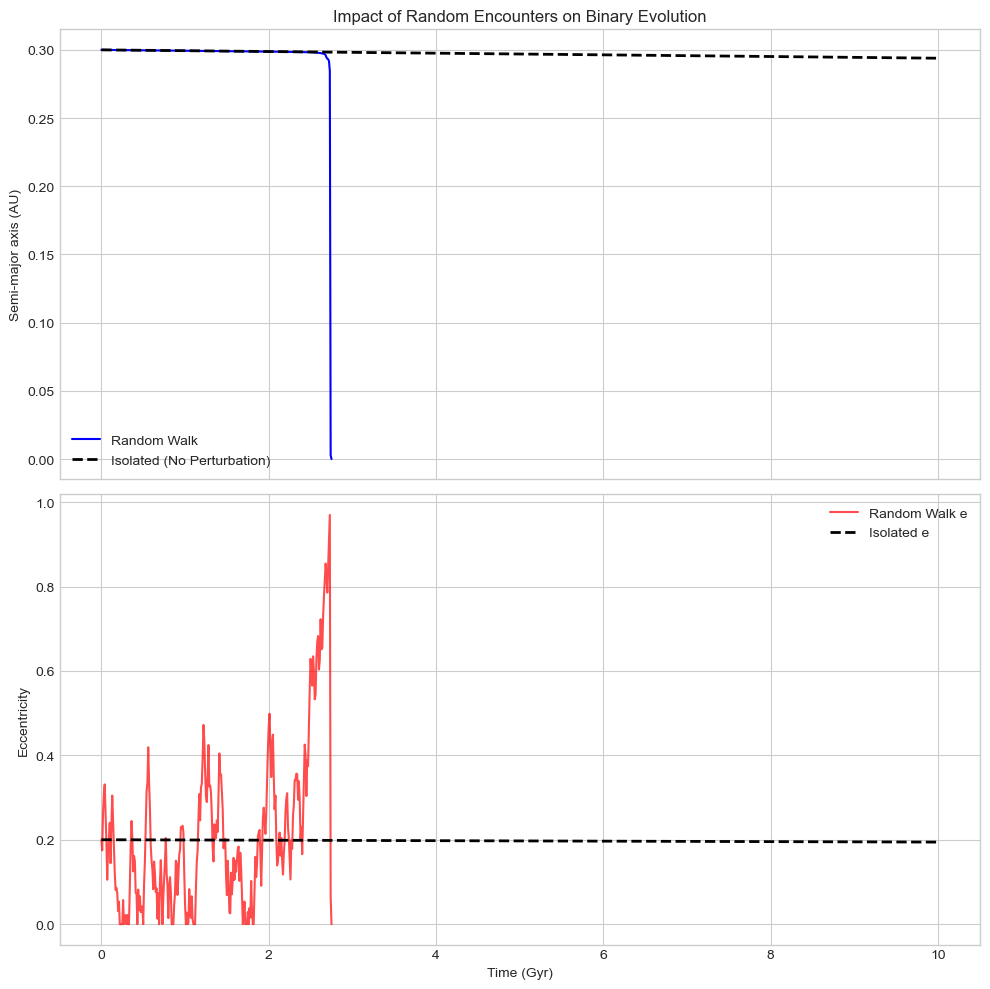

In [26]:
# --- Setup for Task 4 ---
# Initial Conditions
m1_rw = 20 * M_sun
m2_rw = 20 * M_sun
a0_rw = 0.3 * AU
e0_rw = 0.2

# Time settings
dt_step = 10 * Myr      # Perturbation interval
t_max = 10 * Gyr        # Max duration
num_steps = int(t_max / dt_step)

# Storage for results
time_rw = [0]
a_rw = [a0_rw]
e_rw = [e0_rw]

# Current state
current_y = [a0_rw, e0_rw]
current_t = 0

np.random.seed(42) # For reproducibility

# --- The Simulation Loop ---
for i in range(num_steps):
    # 1. Integrate for one time step (dt)
    # We define a tiny time array: [start, end]
    t_span = [current_t, current_t + dt_step]
    
    sol = odeint(gw_derivs, current_y, t_span, args=(m1_rw, m2_rw))
    
    # Get values at the end of the step
    a_new, e_new = sol[-1]
    
    # Check for merger (stop if a is tiny)
    if a_new < 1000:
        print(f"Merger occurred at {current_t/Gyr:.2f} Gyr")
        break
        
    # 2. Apply Random Perturbation to eccentricity
    # Delta e = U(-0.1, 0.1) * (a / a0)^(3/2)
    # Note: Using current 'a' (a_new) relative to initial a0_rw
    random_kick = np.random.uniform(-0.1, 0.1)
    scaling_factor = (a_new / a0_rw)**1.5
    delta_e = random_kick * scaling_factor
    
    e_perturbed = e_new + delta_e
    
    # 3. Enforce Physical Constraints
    if e_perturbed < 0:
        e_perturbed = 0  # e cannot be negative
    if e_perturbed >= 1.0:
        e_perturbed = 0.99 # e < 1 for bound orbit (simplified)
        
    # 4. Update State
    current_y = [a_new, e_perturbed]
    current_t += dt_step
    
    # Store history
    time_rw.append(current_t)
    a_rw.append(a_new)
    e_rw.append(e_perturbed)


# --- Comparison: Isolated Evolution (No kicks) ---
# Run standard odeint for the full duration
t_iso = np.linspace(0, 10*Gyr, 1000)
y0_iso = [a0_rw, e0_rw]
sol_iso = odeint(gw_derivs, y0_iso, t_iso, args=(m1_rw, m2_rw))

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot Semi-Major Axis
ax1.plot(np.array(time_rw)/Gyr, np.array(a_rw)/AU, 'b-', label='Random Walk')
ax1.plot(t_iso/Gyr, sol_iso[:,0]/AU, 'k--', label='Isolated (No Perturbation)', linewidth=2)
ax1.set_ylabel('Semi-major axis (AU)')
ax1.set_title('Impact of Random Encounters on Binary Evolution')
ax1.legend()

# Plot Eccentricity
ax2.plot(np.array(time_rw)/Gyr, e_rw, 'r-', label='Random Walk e', alpha=0.7)
ax2.plot(t_iso/Gyr, sol_iso[:,1], 'k--', label='Isolated e', linewidth=2)
ax2.set_ylabel('Eccentricity')
ax2.set_xlabel('Time (Gyr)')
ax2.legend()

plt.tight_layout()
plt.show()